# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\fptshop\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
table1 = pd.read_csv('Data/table1.csv')
table2 = pd.read_csv('Data/table2.csv')

### Reactions analysis

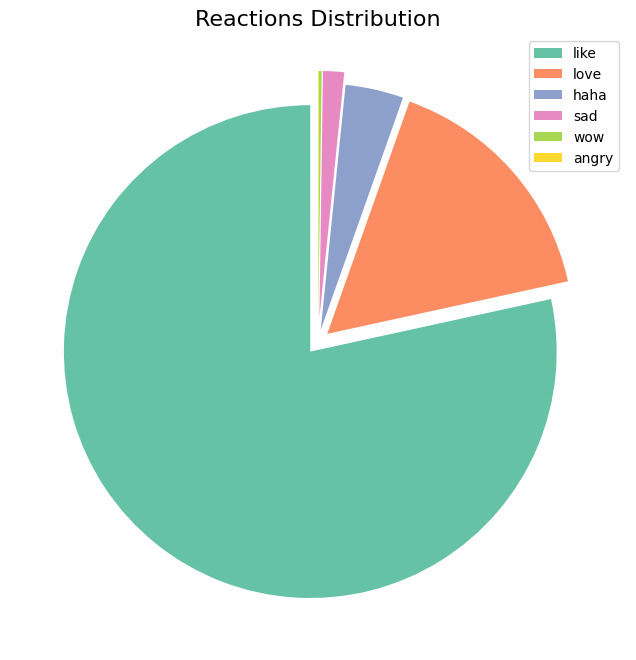

In [4]:
keys = ['like', 'love', 'haha', 'sad', 'wow', 'angry']
values = [table1[key].sum() for key in keys]

# Matplotlib's "Set2" color map
colors = plt.cm.Set2(range(len(keys)))

# Set up explode
explode = [0.05, 0.05, 0.05, 0.1, 0.1, 0.1]

# Draw a pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(values, labels=None, autopct='', startangle=90, colors=colors, explode=explode)

# Add legend
plt.legend(patches, keys, loc='best')
for text, autotext, color in zip(texts, autotexts, colors):
    text.set_color(color)
    autotext.set_color('white')  # White text to show on dark colors

# Add title
plt.title('Reactions Distribution', fontsize=16)

# Show the chart
plt.show()


### Correlation

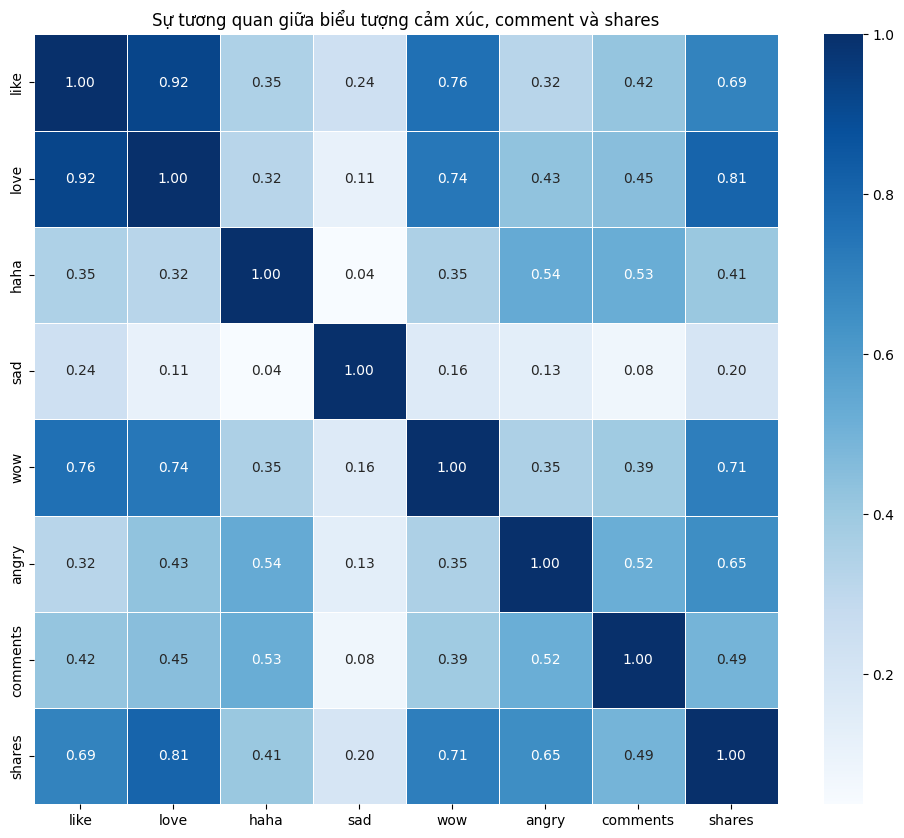

In [5]:
# Chọn các cột còn để tạo correllagram
selected_columns = ['like', 'love', 'haha', 'sad','wow', 'angry', 'comments', 'shares']
# Tạo một DataFrame con chứa chỉ các cột đã chon correlation_data df[selected_columns]
correlation_data = table1[selected_columns]
# Tình ma trận tương quan
correlation_matrix = correlation_data.corr()
#ve correl Logram bằng Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap='Blues', fmt='.2f', linewidths = .5)
plt.title("Sự tương quan giữa biểu tượng cảm xúc, comment và shares")
plt.show()

### Average interaction rate of a post

In [6]:
table1['reaction_count'].mean()

15042.422343324251

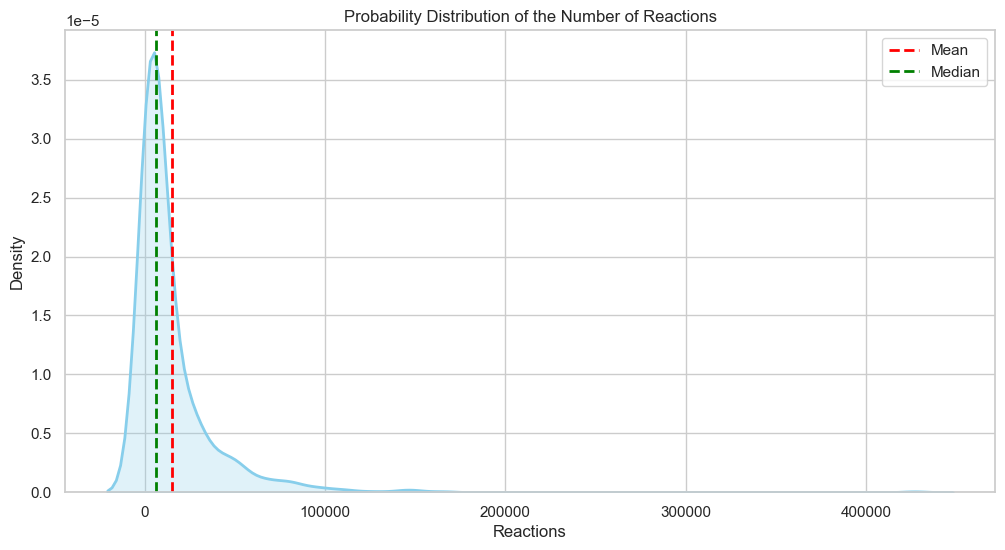

In [7]:
# Set the style for the plot
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the Kernel Density Estimate (KDE) with fill
sns.kdeplot(data=table1['reaction_count'], fill=True, color='skyblue', linewidth=2)

# Add vertical lines for mean and median
plt.axvline(table1['reaction_count'].mean(), color='red', linestyle='--', label='Mean', linewidth=2)
plt.axvline(table1['reaction_count'].median(), color='green', linestyle='--', label='Median', linewidth=2)

# Label the axes and add legend
plt.xlabel('Reactions')
plt.ylabel('Density')
plt.legend()

# Add a title
plt.title('Probability Distribution of the Number of Reactions')

# Show the plot
plt.show()

### Top reacted posts

In [8]:
table1['total_reactions'] = table1['reaction_count'] + table1['comments']
top5_posts = table1.nlargest(5, 'comments')[['text', 'comments', 'reaction_count']]

top5_posts

,text,comments,reaction_count
451,Lionel Messi has some words to say about Crist...,19179.0,9149
477,LIONEL MESSI WINS BALLON D’OR NUMBER EIGHT 🐐\n...,9438.0,127290
510,Erik ten Hag sees the positives 😶,6422.0,30760
476,The greatest there is.\n\nThe greatest there e...,6264.0,98545
622,Karim Benzema given crazy welcome by Al-Ittiha...,5879.0,426884


### Comments, Shares and Reaction Count by Day

C:\Users\fptshop\AppData\Local\Temp\ipykernel_6268\3707146847.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=colors)
C:\Users\fptshop\AppData\Local\Temp\ipykernel_6268\3707146847.py:9: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(x=counts.index, y=counts.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=colors)


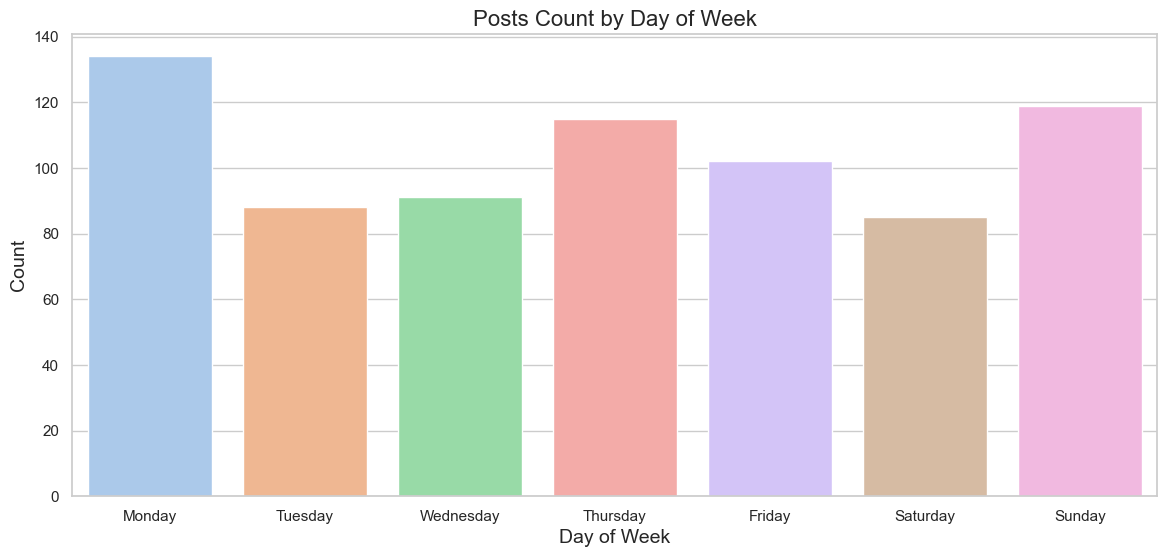

In [9]:
# Get count values and sort them in order
counts = table1['day'].value_counts()

# Colors for the bars
colors = sns.color_palette("pastel")

# Plot the bar chart with x-axis labels ordered
plt.figure(figsize=(14, 6))
sns.barplot(x=counts.index, y=counts.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=colors)

# Add title and labels
plt.title('Posts Count by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()


### Hourly interaction volume.

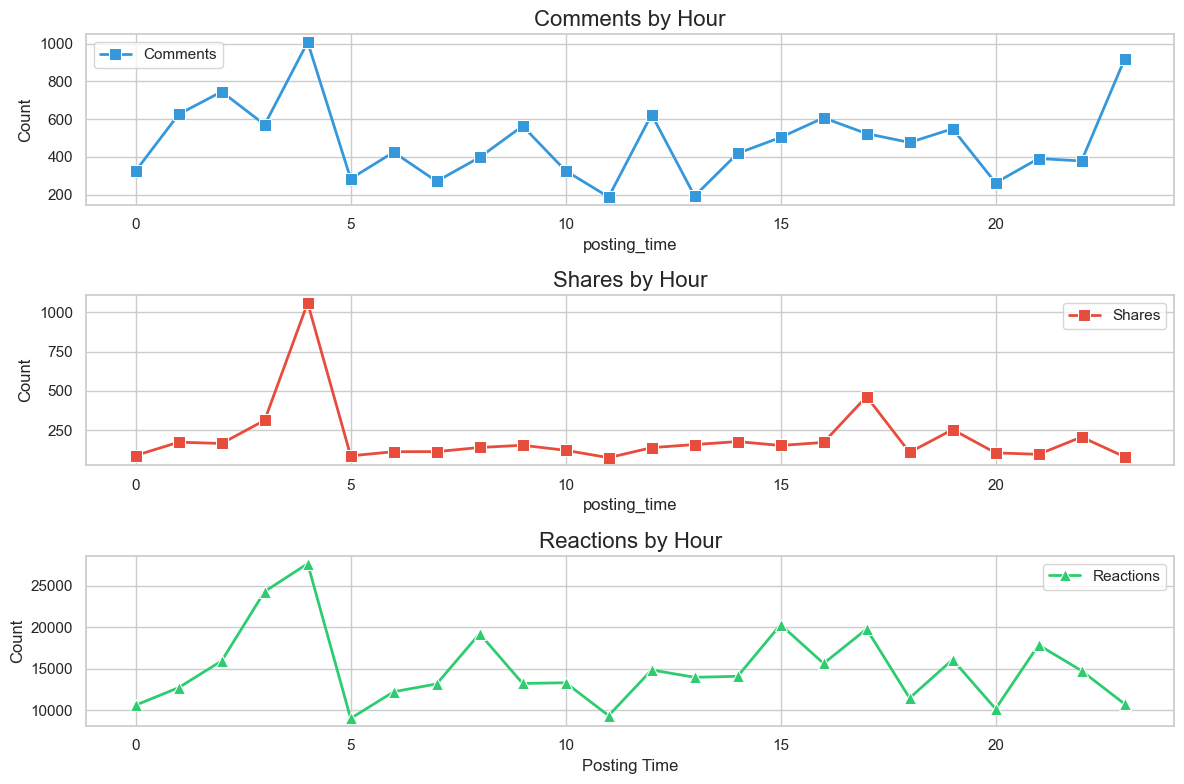

In [10]:
# Create charts for Comments, Shares, and Reactions
plt.figure(figsize=(12, 8))

# Chart for Comments
plt.subplot(3, 1, 1)
sns.lineplot(data=table1, x="posting_time", y="comments", err_style=None, label='Comments', color='#3498db', linewidth=2, marker='s', markersize=8)
plt.title('Comments by Hour', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.legend()

# Chart for Shares
plt.subplot(3, 1, 2)
sns.lineplot(data=table1, x="posting_time", y="shares", err_style=None, label='Shares', color='#e74c3c', linewidth=2, marker='s', markersize=8)
plt.title('Shares by Hour', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.legend()

# Chart for Reactions
plt.subplot(3, 1, 3)
sns.lineplot(data=table1, x="posting_time", y="reaction_count", err_style=None, label='Reactions', color='#2ecc71', linewidth=2, marker='^', markersize=8)
plt.title('Reactions by Hour', fontsize=16)
plt.xlabel('Posting Time', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()

plt.tight_layout()  # Ensure no overlapping between subplots
plt.show()


###  Number of posts per hour

C:\Users\fptshop\AppData\Local\Temp\ipykernel_6268\3944324884.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, order=sorted(counts.index), palette=colors)


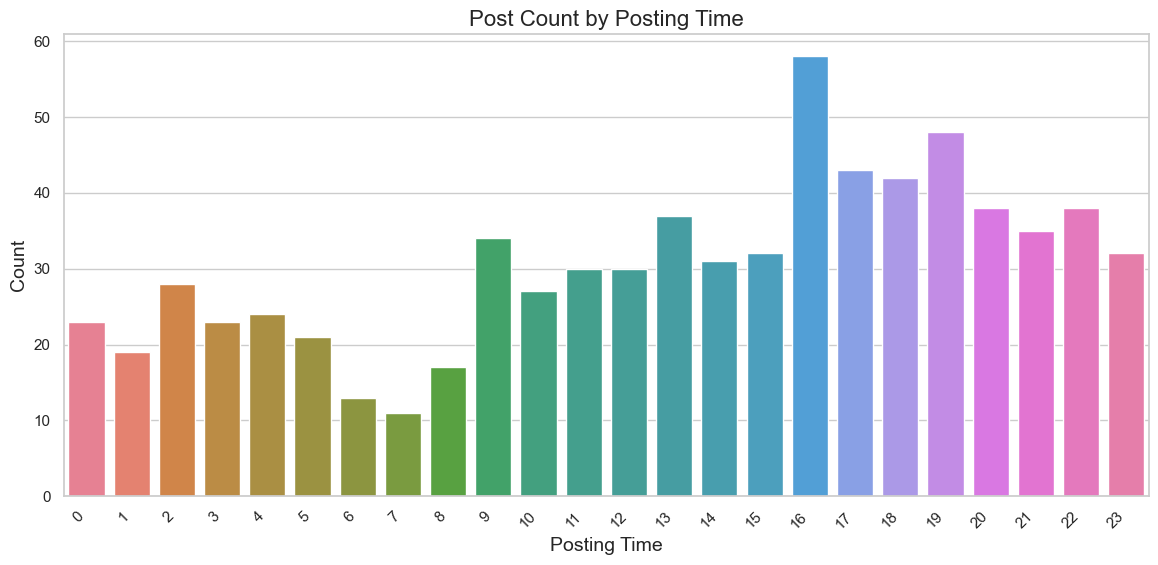

In [11]:
# Get count values and sort them in order
counts = table1['posting_time'].value_counts()

# Colors for the bars
colors = sns.color_palette("husl", n_colors=len(counts))

# Plot the bar chart with x-axis labels ordered
plt.figure(figsize=(14, 6))
sns.barplot(x=counts.index, y=counts.values, order=sorted(counts.index), palette=colors)

# Add title and labels
plt.title('Post Count by Posting Time', fontsize=16)
plt.xlabel('Posting Time', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Format the x-axis if there are too many hours
plt.xticks(rotation=45, ha='right')

plt.show()


### Number posts per day

C:\Users\fptshop\AppData\Local\Temp\ipykernel_6268\3707146847.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=colors)
C:\Users\fptshop\AppData\Local\Temp\ipykernel_6268\3707146847.py:9: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(x=counts.index, y=counts.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=colors)


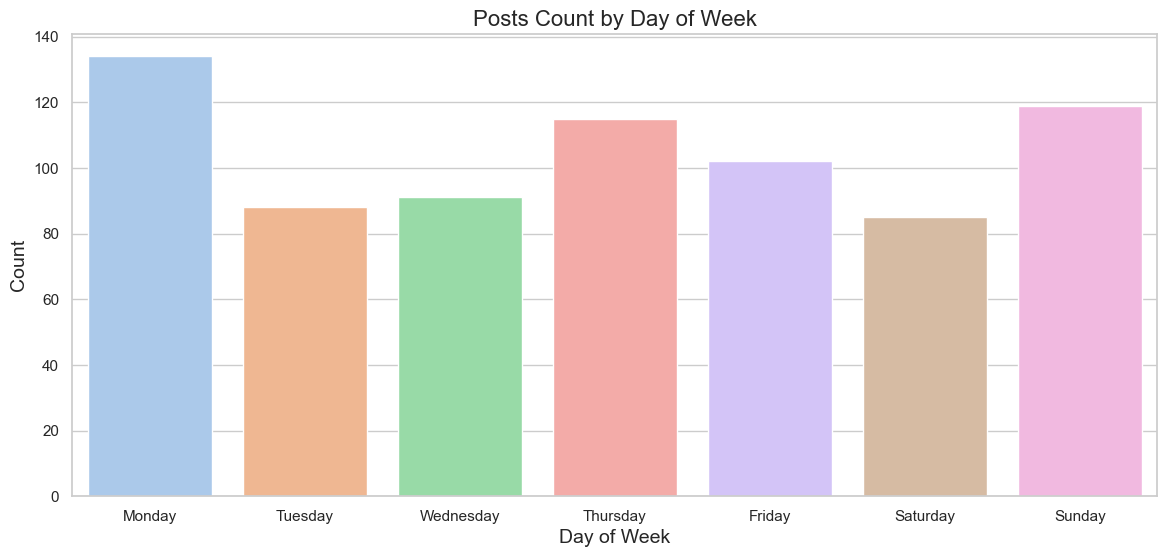

In [12]:
# Get count values and sort them in order
counts = table1['day'].value_counts()

# Colors for the bars
colors = sns.color_palette("pastel")

# Plot the bar chart with x-axis labels ordered
plt.figure(figsize=(14, 6))
sns.barplot(x=counts.index, y=counts.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=colors)

# Add title and labels
plt.title('Posts Count by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()


### Worldcloud

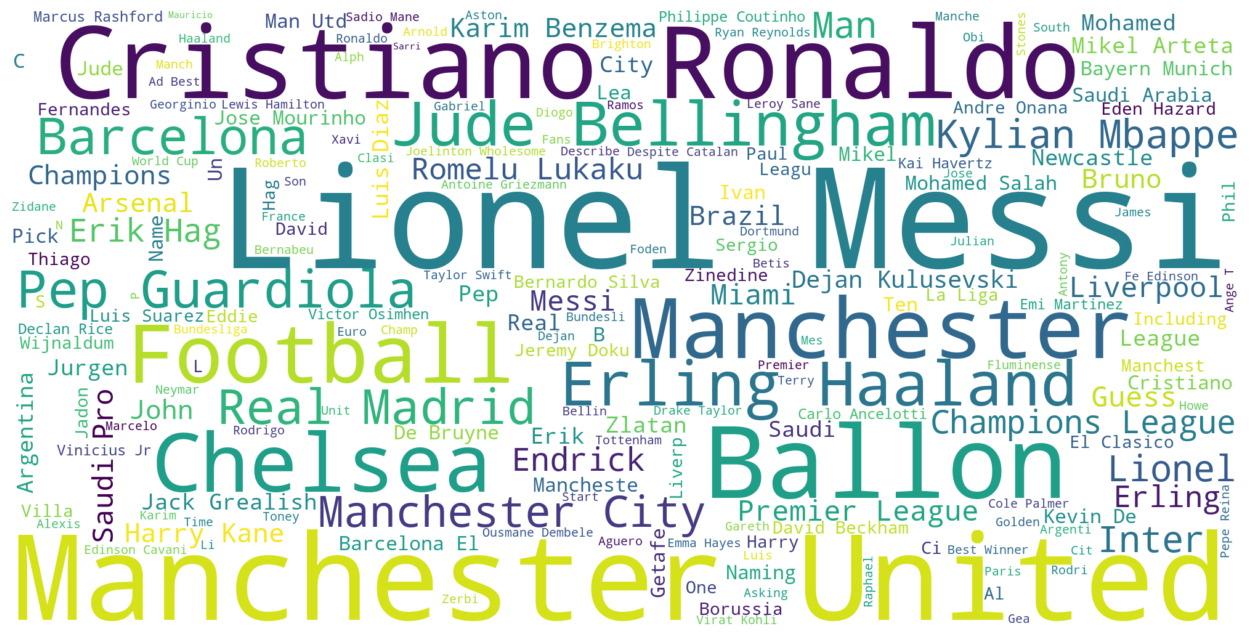

In [13]:
# Start with one review:
text = table1['text'].to_string(index=False)
capitalized_words = ' '.join(word for word in text.split() if word.istitle())
# Create and generate a word cloud image:
wordcloud = WordCloud(
    background_color='white',  # Set the background color
    width=2000, height=1000,      # Set the dimensions of the word cloud image
    max_words=200,              # Set the maximum number of words to be displayed
    colormap='viridis_r'          # Set the color map
).generate(capitalized_words)

# Display the generated image:
plt.figure(figsize=(16, 8))     # Set the size of the plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Most talked-about words by commenters.

In [14]:
new_df = pd.melt(table2['comment'].apply(lambda x: pd.Series(str(x).split(' '))))

In [15]:
new_df = new_df.dropna()

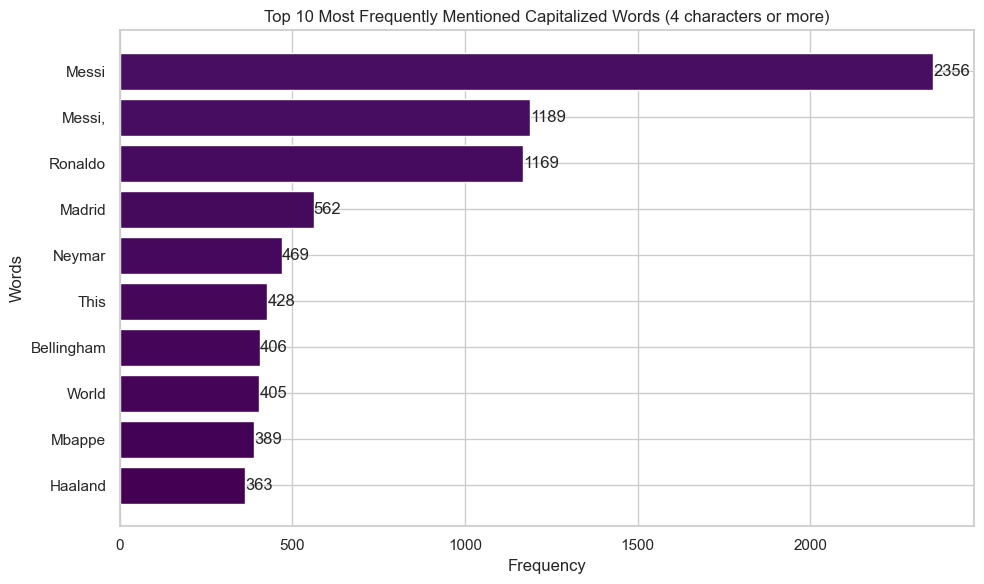

In [16]:
# Assume new_df is a DataFrame containing each word in the "Word" column

# Filter out words that start with a capital letter and have a length of 4 or more characters
filtered_words = new_df[(new_df['value'].str.istitle()) & (new_df['value'].str.len() >= 4)]

# Count the occurrences of each word
word_counts = filtered_words['value'].value_counts()

# Select the top 10 most frequently mentioned words and sort them
top_10_words = word_counts.head(10).sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust the chart size

# Use different colors for each bar
colors = plt.cm.viridis(range(len(top_10_words)))

plt.barh(top_10_words.index, top_10_words.values, color=colors)  # Use barh instead of bar
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequently Mentioned Capitalized Words (4 characters or more)')

# Display the values to the left of each bar
for i, value in enumerate(top_10_words.values):
    plt.text(value + 0.1, i, str(value), ha='left', va='center')

plt.tight_layout()  # Ensure no content is cut off
plt.show()


### Comments per day

C:\Users\fptshop\AppData\Local\Temp\ipykernel_6268\29576132.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day', data=table2, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


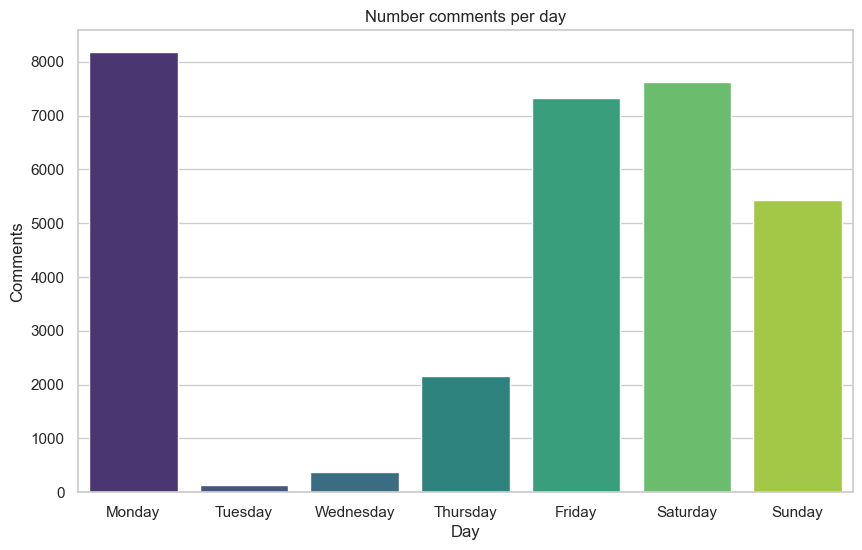

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='day', data=table2, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number comments per day')
plt.xlabel('Day')
plt.ylabel('Comments')
plt.show()